### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variables are the test conditions (Congurent and Incongurent).
The Dependent variable: the time it takes to name the ink colors in equally-sized lists.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesis should be that the mean time for colour recognition for congruent words is equal to or greater than the mean time for incongruent words, therefore implying a one-tailed test. The alternative hypothesis should be that the congruent words mean is less than the incongruent words mean.

H0: μC ≥ μI

HA: μC < μI

where μ is a population mean, the subscript "C" represents the congruent words condition, and the subscript "I" represents the incongruent words condition.

A one-tailed, dependent samples t-test comparing the difference in means (the time to name the ink colors for congruent words and incongruent words) should be performed. With this test, we seek to determine whether there is enough evidence in the provided sample of data to infer that the congruent words mean colour recognition time is less than the incongruent words mean colour recognition time for the entire population and not just the sample data.

A t-test is appropriate because the population variance is unknown and the sample size is less than 30. When the sample size is less than 30, the sample data no longer approximate a normal distribution, which makes the use of a Z-value inappropriate.1 The following assumptions are required for t-tests for dependent means:2

Interval or ratio scale of measurement (approximately interval)
Random sampling from a defined population
Samples or sets of data used to produce the difference scores are linked in the population through repeated measurement, natural association, or matching
Scores are normally distributed in the population; difference scores are normally distributed
A one-tailed test is appropriate under the assumption that incongruent word conditions will not improve recognition times, which is intuitive. The one-tailed test allows for a more scrutinous examination of the negative impact of incongruent word conditions on recognition times.

The t-test should be of the dependent samples variety because the same subject is exposed to two conditions and tested for each, which are the defining criteria for "within-subjects" or "repeated-measures" statistical tests.3

Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


I calculated the means of reaction time for Congruent and Incongruent test conditions.

In [3]:
congruentMean = df['Congruent'].mean()
print(congruentMean)

14.051125


In [4]:
incongruentMean = df['Incongruent'].mean()
print(incongruentMean)

22.0159166667


I  want to use Python's statistics module to get the sample standard deviation and calculated the standard deviation of reaction time for Congruent and Incongruent test conditions

In [5]:
congruentList = df['Congruent']

sampleStdCon = statistics.stdev(congruentList)

print(sampleStdCon)

3.5593579576451955


In [6]:
incongruentList = df['Incongruent']

sampleStdIncon = statistics.stdev(incongruentList)

print(sampleStdIncon)

4.7970571224691385


I used Python's statistics module to calculated the sample variance of reaction time for Congruent and Incongruent test conditions.

In [7]:
statistics.variance(congruentList)

12.669029070652176

In [8]:
statistics.variance(incongruentList)

23.011757036231888

I also calculated the difference of avareges to get the observed difference between the two test cases.

In [12]:
congruentMean = df['Congruent'].mean()
incongruentMean = df['Incongruent'].mean()
obsDiffMean = incongruentMean - congruentMean
print(obsDiffMean)

7.96479166667


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

At first I made a visualization about the ditribution of the reaction times for congruent and incongruent condition. I used the congruent_list and incongruent_list variables. According to my results, the reaction time can be longer under incongruent word conditions.

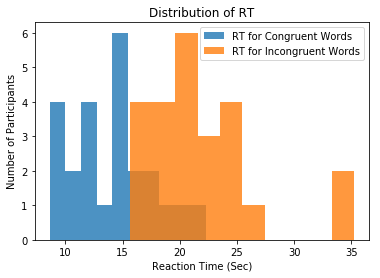

In [28]:
congruentList = df['Congruent']
incongruentList = df['Incongruent']
plt.hist(congruentList , alpha=0.8, label='RT for Congruent Words')
plt.hist(incongruentList , alpha=0.8, label='RT for Incongruent Words')
plt.xlabel('Reaction Time (Sec)')
plt.ylabel('Number of Participants')
plt.title('Distribution of RT')
plt.legend(loc='upper right')
plt.show()

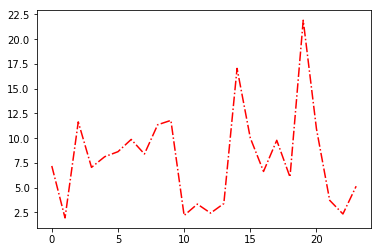

In [13]:
# plot the differences between the average reaction time
congruentList = df['Congruent']
incongruentList = df['Incongruent']
diff = incongruentList - congruentList
plt.plot(diff, color='red', linestyle = 'dashdot')

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [28]:
# Calculte the mean of each test
mean_congurent = df['Congruent'].mean()
mean_incongurant = df['Incongruent'].mean()

# Calculte a point estimate using (mean_congurent - mean_incongurant) / Average of differences
estimate_point = mean_congurent - mean_incongurant

# Calculate Square of Sums of difference of sample means
ssd = sum( ( (df['Congruent'] - df['Incongruent']) - estimate_point ) ** 2  )

# Calculate the variance of difference
vd = ssd / (24 -1)

# Calculate Standard Deviation of Differences
sdd = vd ** (1/2)
############################################
# We can get this result easily using pandas std() 
# but before we have to add a column this way
# stroop_data['difference'] = stroop_data['Incongruent'] - stroop_data['Congruent']
# sdt = stroop_data.std()
# sdd = sdt['difference']
############################################

#  calculate the t-statistic for the difference
tstatistic = estimate_point / ( sdd / ( 24 ** (1/2) ) )

############################################
# We could find t-statistic easily importing stats from scipy.stats
# import scipy.stats as stats
# stats.ttest_rel(a = stroop_data['Congruent'], b = stroop_data['Incongruent'])
# Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)
# then we get the tstatistic  and the p value
############################################

# Calculate the Degrees of Freedom (n -1)
df = 23

# Calculte the chances of seeing a result as extreme as the one we observed (known as the p-value)
pvalue = stats.t.cdf(x = tstatistic, df = 23 ) * 2 

# Clacute t-critical for alpha level 0.005 (aiming to 99% confidence level)
alpha = 0.005
tcritical = stats.t.ppf(q=alpha,df=23)

In [29]:
print("Degrees of Freedom : df =", df)
print("Alpha- level : a =", alpha)
print("t-critical values :  tc  =", -tcritical, tcritical)
print("t-Statistic(df) : t(23) =", tstatistic)
print("p-value : p =", pvalue)

Degrees of Freedom : df = 23
Alpha- level : a = 0.005
t-critical values :  tc  = 2.80733568377 -2.80733568377
t-Statistic(df) : t(23) = -8.02070694411
p-value : p = 4.10300058571e-08


f the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations. Therefore, you reject the null hypothesis that there is no statistically significant difference between the two populations.

# We observe that:
  ## The t-Statistic is clearly smaller than the negative t-critical value
  ## In the critical region with a p-value < 0.0001

Therefore we reject the Null Hypothesis with a 99% Confidence level and conclude that there is a significant difference in the scores for congruent and incongruent tasks.
The results match up with our observations and expectations that there is indeed a statistically significant difference in the response time to perform the incongruent test compared to the congruent test.

# Sourse :
http://davidventuri.github.io/udacity-dand-p1/

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--